In [1]:
library(randomForest)
library(caret)
library(ggplot2)
library(Metrics)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice


Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




In [2]:
df <- read.csv("../../../Cleaned Datasets R/prices_cleaned.csv")

set.seed(42)

train_index <- createDataPartition(df$Price, p = 0.7, list = FALSE)

train_data <- df[train_index, ]
test_data <- df[-train_index, ]

In [3]:
set.seed(42)

num_predictors <- length(names(train_data)) - 1
mtry_sqrt <- floor(sqrt(num_predictors))

model <- randomForest(Price ~ ., data = train_data, ntree = 150, 
            mtry = mtry_sqrt, maxnodes=20, do.trace=TRUE)

print(model)
summary(model)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 |   0.6179    61.04 |
   2 |   0.6814    67.32 |
   3 |   0.6319    62.43 |
   4 |   0.6141    60.67 |
   5 |   0.6324    62.48 |
   6 |   0.6212    61.37 |
   7 |   0.6126    60.52 |
   8 |   0.6011    59.38 |
   9 |   0.5999    59.27 |
  10 |   0.5987    59.15 |
  11 |   0.5944    58.73 |
  12 |   0.5918    58.47 |
  13 |   0.5922    58.51 |
  14 |   0.5872    58.01 |
  15 |   0.5817    57.47 |
  16 |   0.5766    56.96 |
  17 |   0.5718    56.49 |
  18 |    0.566    55.92 |
  19 |   0.5691    56.23 |
  20 |   0.5712    56.44 |
  21 |   0.5687    56.19 |
  22 |   0.5691    56.22 |
  23 |   0.5655    55.87 |
  24 |   0.5678    56.10 |
  25 |   0.5713    56.44 |
  26 |   0.5728    56.59 |
  27 |    0.575    56.81 |
  28 |   0.5774    57.04 |
  29 |   0.5726    56.57 |
  30 |   0.5733    56.64 |
  31 |    0.571    56.41 |
  32 |   0.5722    56.53 |
  33 |   0.5675    56.07 |
  34 |   0.5661    55.93 |
  35 |    0.566    55.91 |
 

                Length Class  Mode     
call               7   -none- call     
type               1   -none- character
predicted       6632   -none- numeric  
mse              150   -none- numeric  
rsq              150   -none- numeric  
oob.times       6632   -none- numeric  
importance        15   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               6632   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [4]:
predictions <- predict(model, test_data)
actual <- test_data$Price

In [5]:
mae_value <- mae(actual, predictions)
print(paste("Mean Absolute Error:", mae_value))

mse_value <- mse(actual, predictions)
print(paste("Mean Squared Error:", mse_value))

rmse_value <- rmse(actual, predictions)
print(paste("Root Mean Squared Error:", rmse_value))

r_squared_value <- summary(lm(predictions ~ actual))$r.squared
print(paste("R-squared score:", r_squared_value))

[1] "Mean Absolute Error: 0.55206909861729"
[1] "Mean Squared Error: 0.546307811871345"
[1] "Root Mean Squared Error: 0.73912638423435"
[1] "R-squared score: 0.542467930262773"


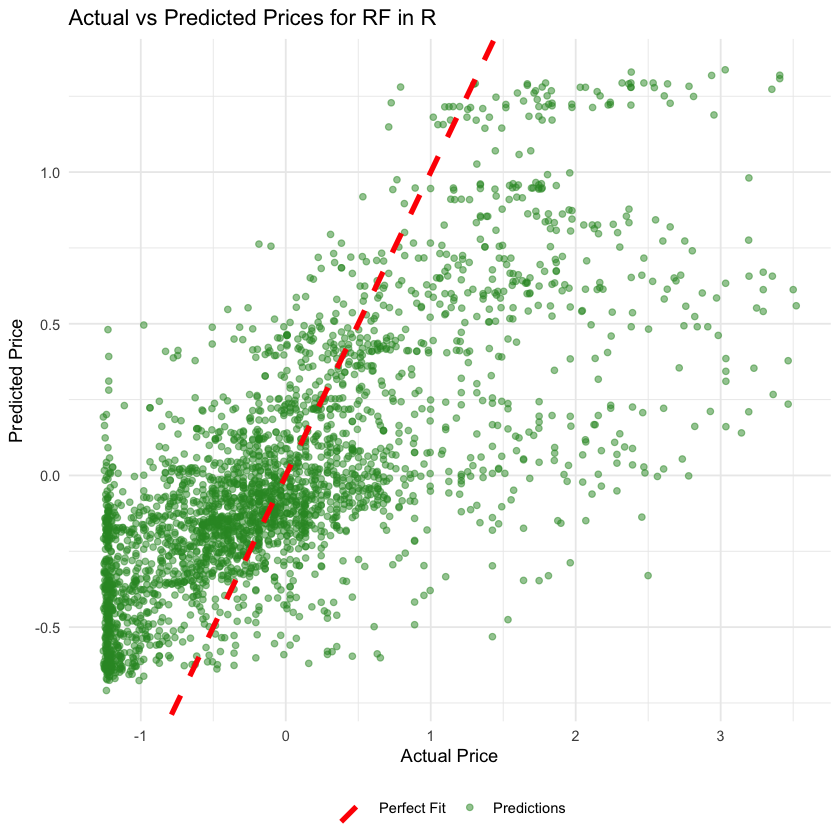

In [6]:
data_plot <- data.frame(
  Actual = actual,
  Predicted = predictions
)

p <- ggplot(data_plot, aes(x = Actual, y = Predicted)) +
  geom_point(aes(color = "Predictions"), alpha = 0.5) + 
  geom_abline(aes(color = "Perfect Fit", intercept = 0, slope = 1), linetype = "dashed", linewidth = 1.5) +
  scale_color_manual(values = c("Predictions" = "#2e942e", "Perfect Fit" = "red"), name = "", labels = c("Perfect Fit","Predictions")) +
  labs(title = "Actual vs Predicted Prices for RF in R", 
       x = "Actual Price", 
       y = "Predicted Price") +
  theme_minimal() +
  theme(legend.position = "bottom")

print(p)